## Purpose: to render sketch gallery for paper figure

In [1]:
import os
import urllib, cStringIO

import pymongo as pm

import matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

import numpy as np
from __future__ import division
import scipy.stats as stats
import pandas as pd
import json
import re

from PIL import Image
import base64

import analysis_helpers as h
reload(h)

## get standardized object list
categories = ['bird','car','chair','dog']
obj_list = []
for cat in categories:
    for i,j in h.objcat.iteritems():
        if j==cat:
            obj_list.append(i)   

In [2]:
## path to curated sketches for figure
path_to_close = 'sketches_pilot2/curated/close'
path_to_far = 'sketches_pilot2/curated/far'
path_to_objects = 'sketches_pilot2/curated/objects'

## get full list of close and far paths
close_paths = [os.path.join(path_to_close,'{}.png'.format(i)) for i in obj_list]
far_paths = [os.path.join(path_to_far,'{}.png'.format(i)) for i in obj_list]
obj_paths =  [os.path.join(path_to_objects,'{}.png'.format(i)) for i in obj_list]

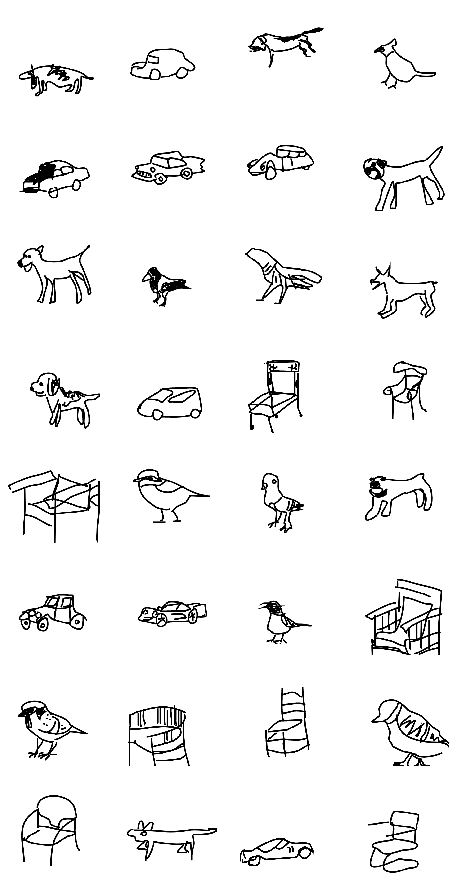

In [41]:
fig = plt.figure(figsize=(8,16),frameon=False)        
for i,f in enumerate(close_paths):
    im = Image.open(f)
    p = plt.subplot(8,4,i+1)
    plt.imshow(im)
    sns.set_style('white')
    k = p.get_xaxis().set_ticklabels([])
    k = p.get_yaxis().set_ticklabels([])
    k = p.get_xaxis().set_ticks([])
    k = p.get_yaxis().set_ticks([])   
    p.axis('off')
    
plt.savefig('./plots/close_gallery.pdf') 
plt.savefig('../manuscript/figures/raw/close_gallery.pdf')     

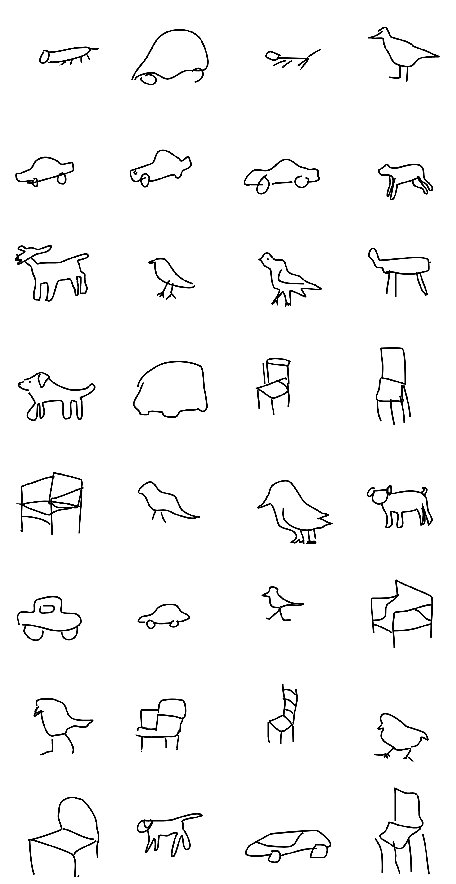

In [42]:
fig = plt.figure(figsize=(8,16),frameon=False)        
for i,f in enumerate(far_paths):
    im = Image.open(f)
    p = plt.subplot(8,4,i+1)
    plt.imshow(im)
    sns.set_style('white')
    k = p.get_xaxis().set_ticklabels([])
    k = p.get_yaxis().set_ticklabels([])
    k = p.get_xaxis().set_ticks([])
    k = p.get_yaxis().set_ticks([])   
    p.axis('off')
    
plt.savefig('./plots/far_gallery.pdf') 
plt.savefig('../manuscript/figures/raw/far_gallery.pdf')     

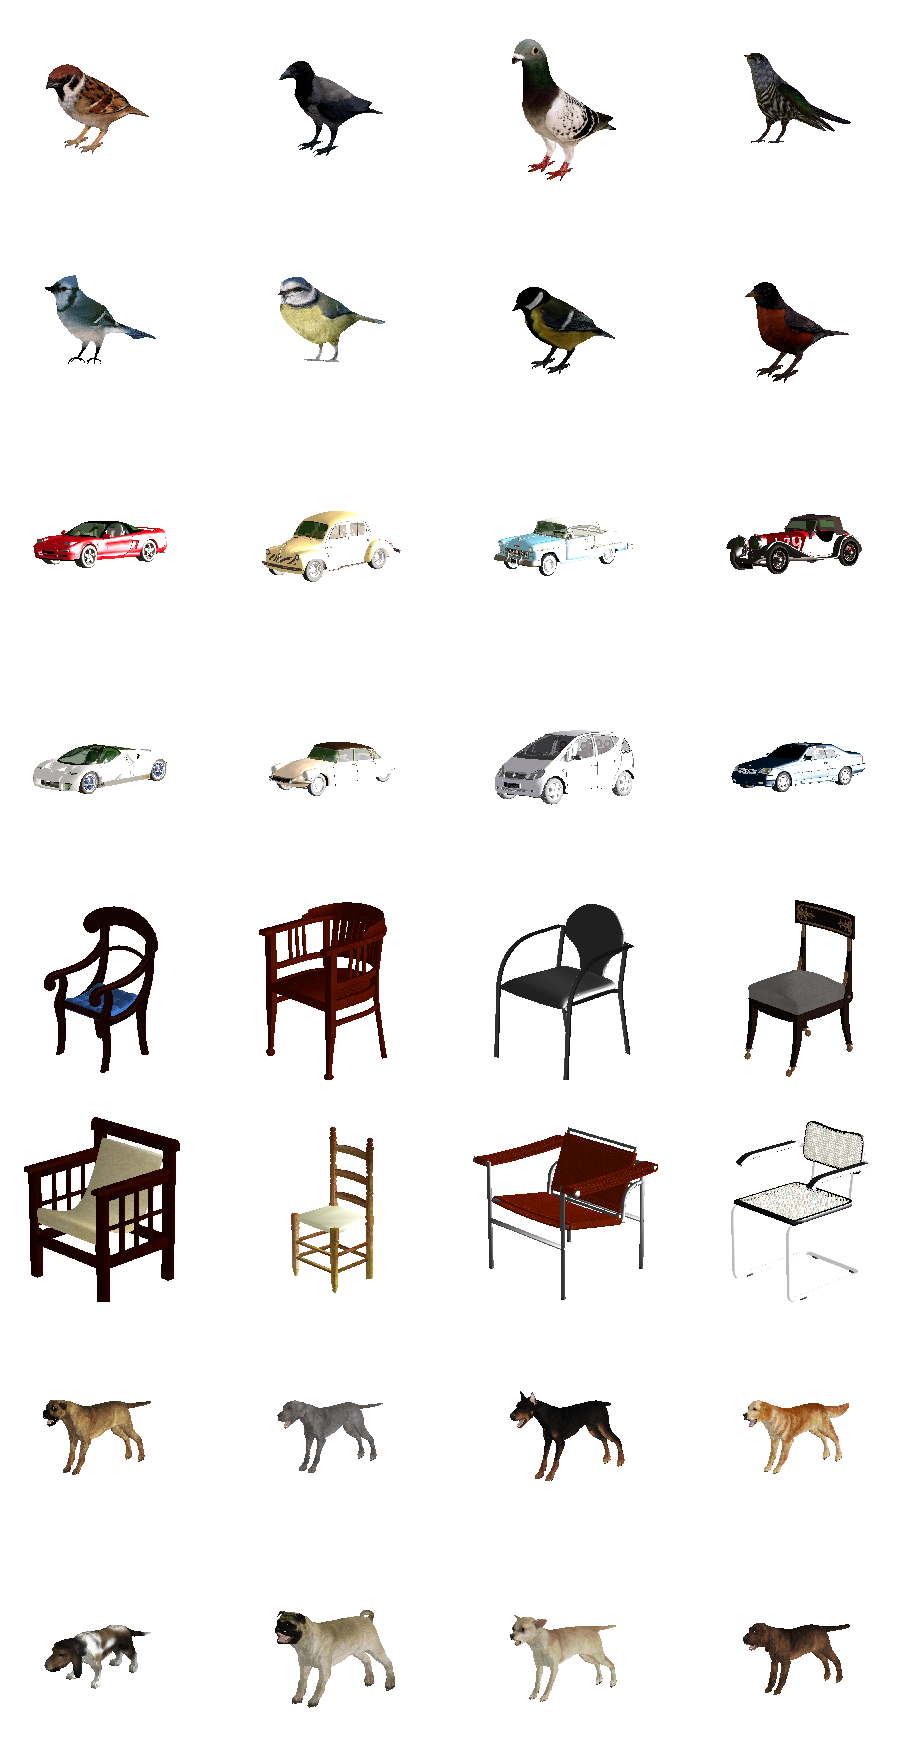

In [7]:
remove_gray = True
fig = plt.figure(figsize=(16,32),frameon=False)        
for i,f in enumerate(obj_paths):
    im = Image.open(f)
    if remove_gray == True:
        im = im.convert("RGBA")
        pixdata = im.load()
        width, height = im.size
        for y in xrange(height):
            for x in xrange(width):
                if pixdata[x, y] == (127, 127, 127, 255):
                    pixdata[x, y] = (127, 127, 127, 0)                
        im.save(f, "PNG")                
    p = plt.subplot(8,4,i+1)        
    plt.imshow(im)
    sns.set_style('white')
    k = p.get_xaxis().set_ticklabels([])
    k = p.get_yaxis().set_ticklabels([])
    k = p.get_xaxis().set_ticks([])
    k = p.get_yaxis().set_ticks([])   
    p.axis('off')
    
plt.savefig('./plots/object_gallery.pdf') 
plt.savefig('../manuscript/figures/raw/object_gallery.pdf')     